In [19]:
# Importando bibliotecas que vão ser utilizadadas para o tratamento, redução e visualização de alguns dados para tomada de decisão na escolha estratégica das variáveis de interesse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', None)

In [20]:
# Importando dicionário de dados fornecido - informações sobre as variáveis e visualizando seu tamanho
dic = pd.read_excel('dicionario_PNS_microdados_2019.xls', skiprows=1)
dic.shape

(5222, 7)

In [21]:
# Visualizando o cabeçalho e alguns dados do dicionário
dic.head(5)

,Posição inicial,Tamanho,Código\nda\nvariável,Quesito,Unnamed: 4,Categorias,Unnamed: 6
0,NaN,NaN,NaN,nº,descrição,Tipo,Descrição
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Parte 1 - Identificação e Controle,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2.0,V0001,NaN,Unidade da Federação,11,Rondônia
4,NaN,NaN,NaN,NaN,NaN,12,Acre


In [22]:
# Retirando linhas vazias 
col = dic.Tamanho.dropna(axis=0).values
ww = col.astype(int)
dic.iloc[:, 2].dropna(axis=0).shape

(1089,)

In [23]:
# Lendo o arquivo que contem a base de dados e estruturando de acordo com a coluna tamanho
df = pd.read_fwf('PNS_2019.txt', header=None, dtype=str, widths=ww)

KeyboardInterrupt: 

In [ ]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [ ]:
# Verificando as informações do dataframe e os tipos de dados das colunas criadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1088 entries, 0 to 1087
dtypes: object(1088)
memory usage: 2.4+ GB


In [ ]:
# Pegando a descrição das variáveis no dicionário de dados pelo índice da coluna
desc = dic.iloc[1:, 4].dropna(axis=0)
desc

3                                    Unidade da Federação
30                                                Estrato
31                                                    UPA
32                    Número de ordem do domicílio na PNS
33                                     Tipo da entrevista
                              ...                        
5199    Idade em meses das crianças nascidas no períod...
5202    Faixa de tempo gasto por dia no deslocamento c...
5207             Tipo de cigarro industrializado comprado
5211         Método contraceptivo mais eficaz que faz uso
5221    Data de geração do arquivo de microdados. Data...
Name: Unnamed: 4, Length: 1089, dtype: object

In [ ]:
# Garantindo que o n° de elementos na lista seja o mesmo que o n° de colunas no dataframe
desc = desc[:1088]
df.columns = desc

In [ ]:
# Visualizando o cabeçalho e alguns dados Já estruturados na nossa base 
df.head()

Unnamed: 4 Unidade da Federação  Estrato        UPA  \
0                            11  1110011  110000016   
1                            11  1110011  110000016   
2                            11  1110011  110000016   
3                            11  1110011  110000016   
4                            11  1110011  110000016   

Unnamed: 4 Número de ordem do domicílio na PNS Tipo da entrevista  \
0                                         0001                 01   
1                                         0001                 01   
2                                         0001                 01   
3                                         0001                 01   
4                                         0001                 01   

Unnamed: 4 Ano de referência Total de moradores Tipo de situação censitária  \
0                       2019                 06                           1   
1                       2019                 06                           1   
2                       2019                 06                           1   
3                       2019                 06                           1   
4                       2019                 06                           1   

Unnamed: 4 Tipo de área  \
0                     1   
1                     1   
2                     1   
3                     1   
4                     1   

Unnamed: 4 Seleção do morador de 15 anos ou mais para responder o questionário individual  \
0                                                           1                               
1                                                           0                               
2                                                           0                               
3                                                           9                               
4                                                           9                               

Unnamed: 4 Seleção do morador de 15 anos ou mais para ter medida antropométrica aferida  \
0                                                         NaN                             
1                                                         NaN                             
2                                                         NaN                             
3                                                         NaN                             
4                                                         NaN                             

Unnamed: 4 Tipo do domicílio  \
0                          1   
1                          1   
2                          1   
3                          1   
4                          1   

Unnamed: 4 Qual é o material que predomina na construção das paredes externas deste domicílio?  \
0                                                           1                                    
1                                                           1                                    
2                                                           1                                    
3                                                           1                                    
4                                                           1                                    

Unnamed: 4 Material predominante na cobertura (telhado) do domicílio  \
0                                                           1          
1                                                           1          
2                                                           1          
3                                                           1          
4                                                           1          

Unnamed: 4 Qual é o material que predomina no piso deste domicílio  \
0                                                           1        
1                                                           1        
2                                                           1        
3              

In [ ]:
# Pegando o nome da coluna e índice
for i in df.columns:
    nome_coluna = i
    index = df.columns.get_loc(nome_coluna)
    print("{} - índice:{} ".format(nome_coluna, index))

Unidade da Federação - índice:0 
Estrato - índice:1 
UPA - índice:2 
Número de ordem do domicílio na PNS - índice:3 
Tipo da entrevista - índice:4 
Ano de referência - índice:5 
Total de moradores - índice:6 
Tipo de situação censitária - índice:7 
Tipo de área - índice:8 
Seleção do morador de 15 anos ou mais para responder o questionário individual - índice:9 
Seleção do morador de 15 anos ou mais para ter medida antropométrica aferida - índice:10 
Tipo do domicílio - índice:11 
Qual é o material que predomina na construção das paredes externas deste domicílio? - índice:12 
Material predominante na cobertura (telhado) do domicílio - índice:13 
Qual é o material que predomina no piso deste domicílio - índice:14 
 Quantos cômodos têm este domicílio - índice:15 
Quantos cômodos estão servindo permanentemente de dormitório para os moradores deste domicílio - índice:16 
Qual é a principal forma de abastecimento de água deste domicílio - índice:17 
Este domicílio está ligado à rede geral d

 O(A) Sr(a) tem alguma sequela física permanente decorrente desse acidente de trabalho - índice:435 
O(A) Sr(a) sabe seu peso?  - índice:436 
Peso - Informado (em kg)
(3 inteiros e 1 casa decimal) - índice:437 
Peso - Final (em kg)
(3 inteiros e 1 casa decimal) - índice:[False False False ... False False False] 
Quanto tempo faz que o(a) Sr(a) se pesou da última vez?  - índice:439 
O(A) Sr(a) sabe sua altura? (mesmo que seja valor aproximado)  - índice:440 
Altura - Informada (em cm)
(3 inteiros) - índice:441 
Altura - Final (em cm)
(3 inteiros) - índice:442 
Marca de imputação para altura e/ou peso referido - índice:443 
A Sra está grávida no momento? - índice:444 
Ontem o(a) Sr(a) comeu arroz, macarrão, polenta, cuscuz ou milho verde.  - índice:445 
Batata comum, mandioca/aipim/macaxeira, cará ou inhame. - índice:446 
Feijão, ervilha, lentilha ou grão de bico. - índice:447 
Carne de boi, porco, frango, peixe - índice:448 
Ovo (frito, cozido ou mexido ).  - índice:449 
Alface, couve, 

In [ ]:
# Selecionando as variáveis de interesse e reduzindo a base
df = df[
    [
    'Unidade da Federação',
    'Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc? ',
    'Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)? ',
    'Sexo',
    'Cor ou raça',
    'Qual é o curso que frequenta',
    'De um modo geral, como é o estado de saúde de________',
    ' Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas ',
    'Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?',
    'Ano de nascimento',
    'Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)',
    'Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como é o estado de saúde de _____________? ',
    'Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)? ',
    'Alguma dessas doenças limita de alguma forma suas atividades habituais (trabalhar, ir à escola, brincar, afazeres domésticos, etc.)',
    'Quando ____ consultou um médico pela última vez',
    'O(A) Sr(a) visita o médico/serviço de saúde regularmente por causa dessa doença mental ou só quando tem algum problema?',
    'Por causa da doença mental Faz acompanhamento regular com profissional de saúde',
    'Atualmente, o(a) Sr(a) fuma algum produto do tabaco? ',
    'E no passado, o(a) Sr(a) fumou algum produto do tabaco diariamente? ',
    'Diagnóstico de TOC (Transtorno obsessivo compulsivo) '
    ]
]

In [ ]:
# Visualizando o cabeçalho e alguns dados Já estruturados na nossa base 
df.head()

Unnamed: 4,Unidade da Federação,"Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?","Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?",Sexo,Cor ou raça,Qual é o curso que frequenta,"De um modo geral, como é o estado de saúde de________",Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas,Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?,Ano de nascimento,"Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)","Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como é o estado de saúde de _____________?",Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)?,"Alguma dessas doenças limita de alguma forma suas atividades habituais (trabalhar, ir à escola, brincar, afazeres domésticos, etc.)",Quando ____ consultou um médico pela última vez,O(A) Sr(a) visita o médico/serviço de saúde regularmente por causa dessa doença mental ou só quando tem algum problema?,Por causa da doença mental Faz acompanhamento regular com profissional de saúde,"Atualmente, o(a) Sr(a) fuma algum produto do tabaco?","E no passado, o(a) Sr(a) fumou algum produto do tabaco diariamente?",Diagnóstico de TOC (Transtorno obsessivo compulsivo)
0,11,NaN,2,2,1,NaN,3,NaN,2,1963,NaN,3,2,1,1,NaN,NaN,3,NaN,NaN
1,11,NaN,NaN,1,4,NaN,3,NaN,NaN,1950,NaN,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN
2,11,NaN,NaN,1,2,NaN,3,NaN,NaN,1987,NaN,4,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,11,NaN,NaN,1,2,04,2,NaN,NaN,9999,NaN,2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,2,4,02,2,NaN,NaN,9999,NaN,2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Unnamed: 4'>

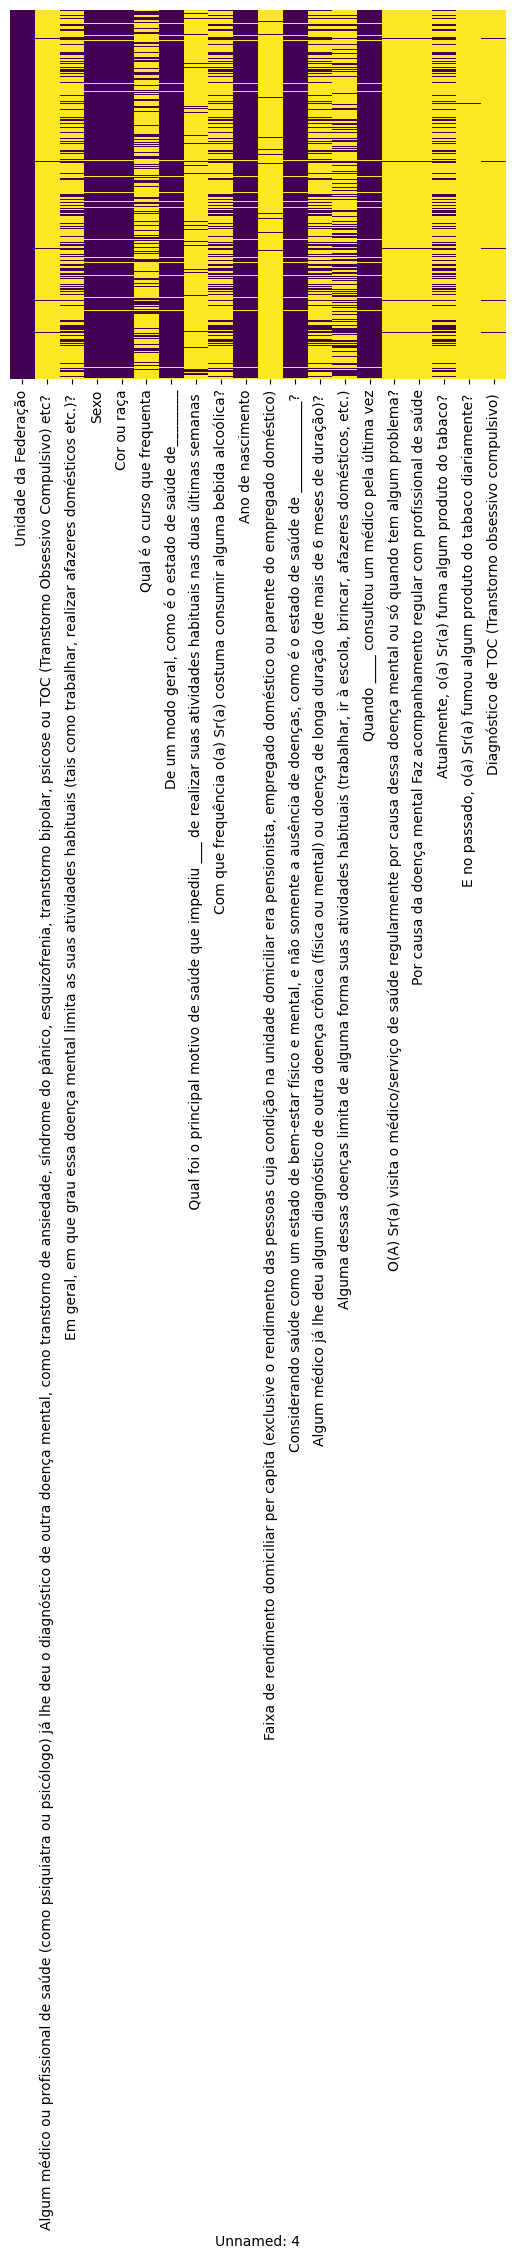

In [ ]:
# Vendo o gráfico de quantidade de dados vazios
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# converte colunas para número
df = df.apply(pd.to_numeric)

In [ ]:
# Salvando arquivo reduzido como csv
df.to_csv('pns-reduzido-2019.csv', sep=',', encoding='utf-8')

In [ ]:
# Visualizando o cabeçalho e alguns dados Já estruturados na nossa base 
df.head()

Unnamed: 4,Unidade da Federação,"Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?","Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?",Sexo,Cor ou raça,Qual é o curso que frequenta,"De um modo geral, como é o estado de saúde de________",Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas,Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?,Ano de nascimento,"Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)","Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como é o estado de saúde de _____________?",Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)?,"Alguma dessas doenças limita de alguma forma suas atividades habituais (trabalhar, ir à escola, brincar, afazeres domésticos, etc.)",Quando ____ consultou um médico pela última vez,O(A) Sr(a) visita o médico/serviço de saúde regularmente por causa dessa doença mental ou só quando tem algum problema?,Por causa da doença mental Faz acompanhamento regular com profissional de saúde,"Atualmente, o(a) Sr(a) fuma algum produto do tabaco?","E no passado, o(a) Sr(a) fumou algum produto do tabaco diariamente?",Diagnóstico de TOC (Transtorno obsessivo compulsivo)
0,11,NaN,2.0,2.0,1.0,NaN,3.0,NaN,2.0,1963.0,NaN,3.0,2.0,1.0,1.0,NaN,NaN,3.0,NaN,NaN
1,11,NaN,NaN,1.0,4.0,NaN,3.0,NaN,NaN,1950.0,NaN,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,11,NaN,NaN,1.0,2.0,NaN,3.0,NaN,NaN,1987.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,11,NaN,NaN,1.0,2.0,4.0,2.0,NaN,NaN,9999.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,2.0,4.0,2.0,2.0,NaN,NaN,9999.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [28]:
agrupado = df.groupby(['Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)']).size()
agrupado

Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)
1.0      44
2.0     116
3.0     199
4.0     274
5.0     298
6.0     278
7.0     279
8.0     286
9.0     280
10.0    269
11.0    230
12.0    274
13.0    244
14.0    288
15.0    259
16.0    250
17.0    272
18.0    292
19.0    255
20.0    235
21.0    284
22.0    256
23.0    299
24.0    255
25.0    229
26.0    153
27.0     84
28.0     23
29.0     10
30.0      1
99.0    116
dtype: int64